### Problem Statement

To explore sentiments of the customers by analysing reviews from an anonymized women’s clothing E-commerce platform

## Imports

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
from nltk.stem import PorterStemmer
import nltk
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import string
from textblob import TextBlob
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CodexNow\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading Data

In [2]:
#loading data in pandas dataframe
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

## Analyzing Data

In [3]:
df['Review Text'].unique()

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
#getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
#number of rows and columns in the data
df.shape

(23486, 11)

In [7]:
#count of data types present in the data
df.dtypes.value_counts()

int64     6
object    5
dtype: int64

In [8]:
#statistics of data
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


<b>Observations:</b>  
1. Unnamed column contains the serial number/index of the reviews.  
2. Clothing ID contains the IDs of different clothes, multiple cloths have same cloth IDs (encoded column)  
3. Minimum Age of the reviewer is 18, maximum age is 99, most records have the ages between 40 and 50.  
4. Recommended IND is a boolean type contains 0(Not Recommended) and 1(Recommended).  
5. Positive Feedback Count contains count of the positive feedback, minimum positive feedback count is 0 


In [9]:
#statistics of object type columns
df.describe(include='O')

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


<b>Observations:</b>
1. There are 13993 unique titles in the dataset.  
2.  Review Text column contains the reviews written by the clients  
3. Division Name, Department Name and Class Name are the categorical variables


In [10]:
#Checking for null values 
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Text(0, 0.5, 'Count of Missing Values')

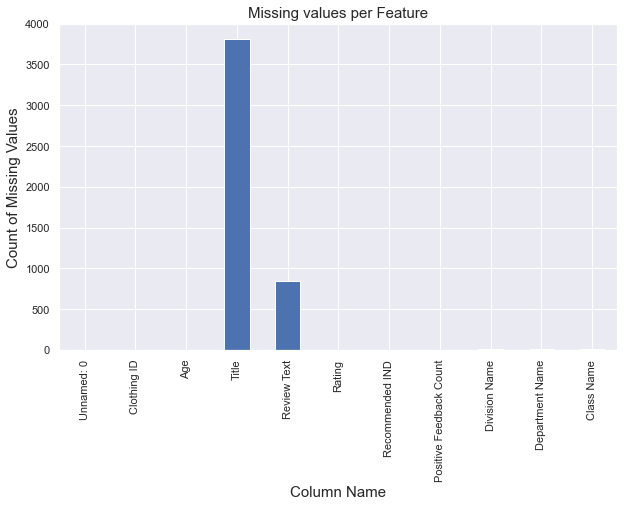

In [11]:
sns.set(rc={'figure.figsize':(10,6)})
pd.isnull(df).sum().plot(kind='bar')
plt.title('Missing values per Feature',size = 15)
plt.xlabel('Column Name',size = 15)
plt.ylabel('Count of Missing Values', size = 15)

<b>Observation:</b>  
1. Title column contains 3810 missing records  
2. Review Text contains 845 missing records  
3. Division Name, Department Name and Class Name contain 14 missing values each

In [12]:
#Percentage of null values
df.isnull().sum()/len(df)*100

Unnamed: 0                  0.000000
Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64

<b>Observation:</b>  
There are 16% missing values in Title, 3.6% in Review Text, 0.6% in Division Name, Department Name and Class Name each.

## Cleaning Data

In [13]:
#dropping NaN values and removing useless columns, as well as clean the text
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
import re
for i in range(len(df)):
    #print(i)
    df['Review Text'][i] = df['Review Text'][i].replace("'s", " is").replace("'ll", " will").replace("'ve", " have").replace("'m", " am").replace("\'", "'")
    
df['Review Text'][1]
df = df.drop('Unnamed: 0', 1)
df.head()

<ipython-input-13-5616f7992984>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Text'][i] = df['Review Text'][i].replace("'s", " is").replace("'ll", " will").replace("'ve", " have").replace("'m", " am").replace("\'", "'")


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [14]:
df.shape

(19662, 10)

In [15]:
df=df.rename({'Recommended IND':'Recommended'})

In [16]:
df['original_rating']=df['Rating']

In [17]:
df['original_rating'].value_counts()

5    10858
4     4289
3     2464
2     1360
1      691
Name: original_rating, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 0 to 19661
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19662 non-null  int64 
 1   Age                      19662 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              19662 non-null  object
 4   Rating                   19662 non-null  int64 
 5   Recommended IND          19662 non-null  int64 
 6   Positive Feedback Count  19662 non-null  int64 
 7   Division Name            19662 non-null  object
 8   Department Name          19662 non-null  object
 9   Class Name               19662 non-null  object
 10  original_rating          19662 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


## Generating Sentiment Column 

We do not have any column in the data that shows the sentiment is positive or negative that is why we are using the column rating. defining a new column named Sentiment and setting the value as True where the rating is 4 or higher. considering rating = 3 as neutral

In [19]:
#eliminating neutral sentiment i.e. rating==3 
df = df[df['Rating'] !=3]

### function to generate sentiment column

In [20]:
#set sentiment 1 (positive) if rating>3 and 0(Negative) if rating<3
def sentiment(n):
    return 1 if n >= 4 else 0
df['Sentiment'] = df['Rating'].apply(sentiment)

In [21]:
df['Sentiment'].value_counts()

1    15147
0     2051
Name: Sentiment, dtype: int64

In [22]:
df['Sentiment'].value_counts()/len(df)*100

1    88.074195
0    11.925805
Name: Sentiment, dtype: float64

In [23]:
df['original_rating'].value_counts()

5    10858
4     4289
2     1360
1      691
Name: original_rating, dtype: int64

## Text Pre_processing

### Removing Punctuations

In [25]:
df["Review Text"] = df['Review Text'].str.replace('[^\w\s]','')

In [26]:
df['Review Text']

1        I love love love this jumpsuit it is fun flirt...
2        This shirt is very flattering to all due to th...
3        I love tracy reese dresses but this one is not...
4        I aded this in my basket at hte last mintue to...
5        I ordered this in carbon for store pick up and...
                               ...                        
19654    I am so impressed with the beautiful color com...
19655    I was surprised at the positive reviews for th...
19656    So i wasnt sure about ordering this skirt beca...
19657    I was very happy to snag this dress at such a ...
19661    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 17198, dtype: object

In [27]:
#defining a function to clean and tokenize the text
#transfering the text to lowercase
def clean_text(comments):
    text = comments.lower()
   
    text = re.sub("[^a-z']"," ", text)
    return text

In [28]:
df["Clean_Reviews"] = df["Review Text"].apply(clean_text)

In [29]:
df["Clean_Reviews"]

1        i love love love this jumpsuit it is fun flirt...
2        this shirt is very flattering to all due to th...
3        i love tracy reese dresses but this one is not...
4        i aded this in my basket at hte last mintue to...
5        i ordered this in carbon for store pick up and...
                               ...                        
19654    i am so impressed with the beautiful color com...
19655    i was surprised at the positive reviews for th...
19656    so i wasnt sure about ordering this skirt beca...
19657    i was very happy to snag this dress at such a ...
19661    this dress in a lovely platinum is feminine an...
Name: Clean_Reviews, Length: 17198, dtype: object

### Tokenization

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CodexNow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
df['Clean_Reviews']=df["Clean_Reviews"].apply(word_tokenize)

### Removing Stopwords

In [32]:
#creating a list of stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'such', 'all', 'has', 'him', 'it', 'itself', "weren't", 'both', 'she', 'an', 'yourself', 'been', 'further', 'once', 'more', "aren't", 'haven', 'own', "mightn't", 'my', 'now', 'its', 'theirs', 'before', 'am', 'hadn', 'after', 'y', "don't", 'your', "haven't", 'mightn', 'didn', 'weren', 'why', 'than', 're', 'what', "won't", 'won', 'shan', 'doing', "wasn't", "you'll", 'ourselves', 'he', 'yours', 'out', 'o', "doesn't", 'those', "mustn't", "it's", 'where', 'again', 'with', 'then', 'on', 'ma', "hasn't", 'no', 'me', 'will', 'mustn', 'in', 'shouldn', 'this', "isn't", 'of', "that'll", 'who', "shan't", "she's", 'did', 'had', 'through', 'when', 'for', 'm', 'few', 'below', 'about', "you've", 'during', 'some', "hadn't", "shouldn't", 'themselves', 'needn', 'most', 'wouldn', 'have', 'can', 'our', 'were', "didn't", 'against', 'by', 'until', 'if', 'do', 'just', 'i', 'ours', 'ain', 'up', 'other', 'which', "should've", 'here', 'these', 'not', 'above', 'nor', 'was', 's', 've', 'himself', 'how', 'each', 'a

In [33]:
stop_words.update(['x','would','also','one','bit','got'])

In [34]:
#Removing Stop Words
df['Clean_Reviews']=df['Clean_Reviews'].apply(lambda x: [item for item in x if item not in stop_words])

In [35]:
df['Clean_Reviews']

1        [love, love, love, jumpsuit, fun, flirty, fabu...
2        [shirt, flattering, due, adjustable, front, ti...
3        [love, tracy, reese, dresses, petite, feet, ta...
4        [aded, basket, hte, last, mintue, see, look, l...
5        [ordered, carbon, store, pick, ton, stuff, alw...
                               ...                        
19654    [impressed, beautiful, color, combinations, em...
19655    [surprised, positive, reviews, product, terrib...
19656    [wasnt, sure, ordering, skirt, couldnt, see, p...
19657    [happy, snag, dress, great, price, easy, slip,...
19661    [dress, lovely, platinum, feminine, fits, perf...
Name: Clean_Reviews, Length: 17198, dtype: object

### Lemmatization

In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CodexNow\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
wnl = WordNetLemmatizer()

In [38]:
#lemmatization to get the root words
def lemmatize(s):
    s = [wnl.lemmatize(word) for word in s]
    return s

In [39]:
df = df.assign(Clean_Reviews= df.Clean_Reviews.apply(lambda x: lemmatize(x)))

### Stemming

In [33]:
#defining a function for stemming text to get root word
def stem_update(text_list):
    text_list_new = []
    for word in text_list:
        word = porter.stem(word)
        text_list_new.append(word) 
    return text_list_new

In [30]:
porter = PorterStemmer()

In [31]:
#df['Clean_Reviews'] = df['Clean_Reviews'].apply(stem_update)

Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word. Stemming follows an algorithm with steps to perform on the words which makes it faster.

### Removing all numbers, size weight 

In [40]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

In [41]:
df['Clean_Reviews'] = df['Clean_Reviews'].apply(drop_numbers)
df['Clean_Reviews'].head()

1    love love love jumpsuit fun flirty fabulous ev...
2    shirt flattering due adjustable front tie perf...
3    love tracy reese dress petite foot tall usuall...
4    aded basket hte last mintue see look like pers...
5    ordered carbon store pick ton stuff always try...
Name: Clean_Reviews, dtype: object

In [42]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,original_rating,Sentiment,Clean_Reviews
1,1049,50,My favorite buy!,I love love love this jumpsuit it is fun flirt...,5,1,0,General Petite,Bottoms,Pants,5,1,love love love jumpsuit fun flirty fabulous ev...
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,5,1,shirt flattering due adjustable front tie perf...
3,1080,49,Not for the very petite,I love tracy reese dresses but this one is not...,2,0,4,General,Dresses,Dresses,2,0,love tracy reese dress petite foot tall usuall...
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,5,1,aded basket hte last mintue see look like pers...
5,858,39,"Shimmer, surprisingly goes with lots",I ordered this in carbon for store pick up and...,4,1,4,General Petite,Tops,Knits,4,1,ordered carbon store pick ton stuff always try...


### Word Count

In [43]:
vectorizer = CountVectorizer()
analyzer = vectorizer.build_analyzer()
def wordcounts(s):
    c = {}
    
    if analyzer(s):
        d = {}
        # find counts of the vocabularies and transform to array 
        w = vectorizer.fit_transform([s]).toarray()
        # vocabulary and index (index of w)
        vc = vectorizer.vocabulary_
        # items() transforms the dictionary's (word, index) tuple pairs
        for k,v in vc.items():
            d[v]=k # d -> index:word 
        for index,i in enumerate(w[0]):
            c[d[index]] = i # c -> word:count
    return  c

# add new column to the dataframe
df['Word Counts'] = df['Clean_Reviews'].apply(wordcounts)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,original_rating,Sentiment,Clean_Reviews,Word Counts
1,1049,50,My favorite buy!,I love love love this jumpsuit it is fun flirt...,5,1,0,General Petite,Bottoms,Pants,5,1,love love love jumpsuit fun flirty fabulous ev...,"{'compliment': 1, 'every': 1, 'fabulous': 1, '..."
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,5,1,shirt flattering due adjustable front tie perf...,"{'adjustable': 1, 'cardigan': 1, 'due': 1, 'fl..."
3,1080,49,Not for the very petite,I love tracy reese dresses but this one is not...,2,0,4,General,Dresses,Dresses,2,0,love tracy reese dress petite foot tall usuall...,"{'alteration': 1, 'away': 1, 'brand': 1, 'colo..."
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,5,1,aded basket hte last mintue see look like pers...,"{'aded': 1, 'baggy': 1, 'basket': 1, 'bummer':..."
5,858,39,"Shimmer, surprisingly goes with lots",I ordered this in carbon for store pick up and...,4,1,4,General Petite,Tops,Knits,4,1,ordered carbon store pick ton stuff always try...,"{'already': 1, 'always': 1, 'big': 1, 'carbon'..."


In [44]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17198 entries, 1 to 19661
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              17198 non-null  int64 
 1   Age                      17198 non-null  int64 
 2   Title                    17198 non-null  object
 3   Review Text              17198 non-null  object
 4   Rating                   17198 non-null  int64 
 5   Recommended IND          17198 non-null  int64 
 6   Positive Feedback Count  17198 non-null  int64 
 7   Division Name            17198 non-null  object
 8   Department Name          17198 non-null  object
 9   Class Name               17198 non-null  object
 10  original_rating          17198 non-null  int64 
 11  Sentiment                17198 non-null  int64 
 12  Clean_Reviews            17198 non-null  object
 13  Word Counts              17198 non-null  object
dtypes: int64(7), object(7)
memory usage: 2

In [46]:
df['Sentiment'].value_counts()

1    15147
0     2051
Name: Sentiment, dtype: int64

In [47]:
df.groupby(by = ['Sentiment'])['Review Text']

In [48]:
temp = df[df['Sentiment']==0]

In [49]:
temp['Review Text']

3        I love tracy reese dresses but this one is not...
19       First of all this is not pullover styling ther...
23       I have been waiting for this sweater coat to s...
29       I ordered this 3 months ago and it finally cam...
47       3 tags sewn in 2 small about 1 long and 1 huge...
                               ...                        
19593    I was very excited to find a fun and lightweig...
19607    Before i ordered this i noted the other review...
19609    What drew me to this shirt was the beautiful s...
19618    This dress is so cute in the photo and fit tru...
19655    I was surprised at the positive reviews for th...
Name: Review Text, Length: 2051, dtype: object

In [50]:
df.shape

(17198, 14)

In [54]:
df_copy = df.copy()

In [55]:
df_copy.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,original_rating,Sentiment,Clean_Reviews,Word Counts
1,1049,50,My favorite buy!,I love love love this jumpsuit it is fun flirt...,5,1,0,General Petite,Bottoms,Pants,5,1,love love love jumpsuit fun flirty fabulous ev...,"{'compliment': 1, 'every': 1, 'fabulous': 1, '..."
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,5,1,shirt flattering due adjustable front tie perf...,"{'adjustable': 1, 'cardigan': 1, 'due': 1, 'fl..."
3,1080,49,Not for the very petite,I love tracy reese dresses but this one is not...,2,0,4,General,Dresses,Dresses,2,0,love tracy reese dress petite foot tall usuall...,"{'alteration': 1, 'away': 1, 'brand': 1, 'colo..."
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,5,1,aded basket hte last mintue see look like pers...,"{'aded': 1, 'baggy': 1, 'basket': 1, 'bummer':..."
5,858,39,"Shimmer, surprisingly goes with lots",I ordered this in carbon for store pick up and...,4,1,4,General Petite,Tops,Knits,4,1,ordered carbon store pick ton stuff always try...,"{'already': 1, 'always': 1, 'big': 1, 'carbon'..."


In [57]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17198 entries, 1 to 19661
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              17198 non-null  int64 
 1   Age                      17198 non-null  int64 
 2   Title                    17198 non-null  object
 3   Review Text              17198 non-null  object
 4   Rating                   17198 non-null  int64 
 5   Recommended IND          17198 non-null  int64 
 6   Positive Feedback Count  17198 non-null  int64 
 7   Division Name            17198 non-null  object
 8   Department Name          17198 non-null  object
 9   Class Name               17198 non-null  object
 10  original_rating          17198 non-null  int64 
 11  Sentiment                17198 non-null  int64 
 12  Clean_Reviews            17198 non-null  object
 13  Word Counts              17198 non-null  object
dtypes: int64(7), object(7)
memory usage: 2

In [58]:
df_copy = df_copy.drop(['Clothing ID', 'Title','Positive Feedback Count','Division Name','Department Name','Word Counts'], axis=1)

In [60]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17198 entries, 1 to 19661
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              17198 non-null  int64 
 1   Review Text      17198 non-null  object
 2   Rating           17198 non-null  int64 
 3   Recommended IND  17198 non-null  int64 
 4   Class Name       17198 non-null  object
 5   original_rating  17198 non-null  int64 
 6   Sentiment        17198 non-null  int64 
 7   Clean_Reviews    17198 non-null  object
dtypes: int64(5), object(3)
memory usage: 1.8+ MB


In [61]:
df_copy.to_csv('Processed_data.csv',index = False)

In [62]:
df_copy['original_rating'].value_counts()

5    10858
4     4289
2     1360
1      691
Name: original_rating, dtype: int64

## Applying Count Vectorizer

In [51]:
X= df[['Clean_Reviews']]

In [52]:
y=df[['Sentiment']]

In [43]:
vectorizer=CountVectorizer()

In [44]:
X = vectorizer.fit_transform(X['Clean_Reviews'])

In [45]:
X

<17198x14758 sparse matrix of type '<class 'numpy.int64'>'
	with 453445 stored elements in Compressed Sparse Row format>

In [46]:
X.shape

(17198, 14758)

In [47]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [48]:
X_test.shape

(3440, 14758)

In [49]:
y_test.shape

(3440, 1)

In [50]:
y_test.head()

,Sentiment
12722,1
16919,1
3507,1
7447,1
4016,1


In [51]:
temp =y_test

In [52]:
temp

,Sentiment
12722,1
16919,1
3507,1
7447,1
4016,1
...,...
14312,1
15538,1
9373,1
16774,1


In [53]:
temp.to_csv('y_test_data.csv',index = False)

In [54]:
X_df = pd.DataFrame(X_test.toarray())

In [55]:
X_df.shape

(3440, 14758)

In [56]:
X_df.to_csv('X_test_data.csv',index = False)

In [57]:
 X_train.shape

(13758, 14758)

In [59]:
13758+3440

17198

## Pickle Logistic Regression

In [61]:
import pickle

Applying Logistic Regression

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)
# save the model to diskf
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
 

c:\users\codexnow\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\codexnow\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9313953488372093


------------------------------------

### Pickling Naive Bayes 

In [64]:
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
# save the model to diskf
filename = 'model_nb.pkl'
pickle.dump(model_nb, open(filename, 'wb'))

c:\users\codexnow\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [65]:
# load the model from disk
loaded_model_nb = pickle.load(open(filename, 'rb'))
result = loaded_model_nb.score(X_test, y_test)
print(result)

0.9281976744186047


### Pickle SVM

In [66]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
# save the model to diskf
filename = 'model_svm.pkl'
pickle.dump(model_svm, open(filename, 'wb'))

c:\users\codexnow\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [67]:
# load the model from disk
loaded_model_svm = pickle.load(open(filename, 'rb'))
result = model_svm.score(X_test, y_test)
print(result)

0.9229651162790697


### Pickle Random Forest

In [68]:
model_rf = RandomForestClassifier() 
model_rf.fit(X_train, y_train)
# save the model to diskf
filename = 'model_rf.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

<ipython-input-68-a7e519e4dda0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


In [69]:
# load the model from disk
loaded_model_rf = pickle.load(open(filename, 'rb'))
result = model_rf.score(X_test, y_test)
print(result)

0.8979651162790697


--------------------------

------------------------------------------

### Word Cloud

In [146]:
from wordcloud import WordCloud, ImageColorGenerator

In [147]:
from PIL import Image

In [148]:
?WordCloud

In [149]:
# Start with one review:
text = df.Clean_Reviews[1]

In [150]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

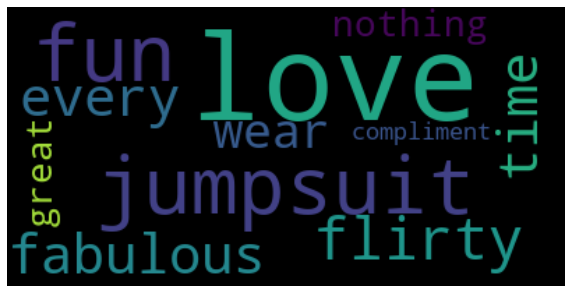

In [151]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

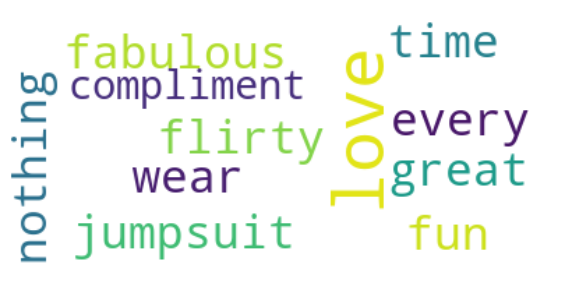

In [152]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [153]:
text = " ".join(review for review in df.Clean_Reviews)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 3141649 words in the combination of all review.


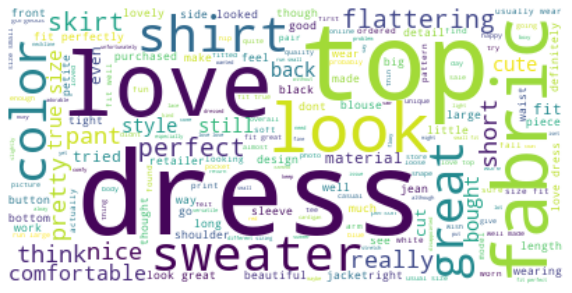

In [154]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [81]:
cleaned_data = df['Clean_Reviews']

In [85]:
cleaned_data= [word for word in cleaned_data if not word.isnumeric()]    

In [86]:
top_N = 100
# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

--------------------------

### Frequency of each word

In [156]:
df.Clean_Reviews.str.split(expand=True).stack().value_counts()[:60]

dress          8730
fit            8004
size           7394
love           7088
top            6221
color          5419
like           5256
wear           5242
look           5231
great          4902
fabric         3601
small          3451
perfect        3181
little         2993
really         2933
ordered        2910
flattering     2783
soft           2686
well           2557
comfortable    2533
bought         2467
nice           2358
back           2302
cute           2216
jean           2162
beautiful      2137
sweater        2103
length         2100
material       2081
shirt          2072
large          2051
petite         2003
run            1974
much           1939
work           1925
long           1872
skirt          1778
short          1770
medium         1768
x              1748
waist          1748
retailer       1739
think          1686
pant           1665
make           1658
store          1649
quality        1648
lb             1648
feel           1642
pretty         1620


In [157]:
df['Age'].value_counts()

39    978
35    643
36    578
34    577
38    564
     ... 
93      2
94      1
99      1
92      1
87      1
Name: Age, Length: 77, dtype: int64

In [158]:
df.Age.value_counts()

39    978
35    643
36    578
34    577
38    564
     ... 
93      2
94      1
99      1
92      1
87      1
Name: Age, Length: 77, dtype: int64

In [ ]:
df['Rating']

--------------------------------------

----------------------------

In [74]:
review = df[['Review Text','Sentiment']]

In [77]:
first =review.loc[2]

In [78]:
first

Review Text    I love tracy reese dresses but this one is not...
Sentiment                                                      0
Name: 2, dtype: object

In [79]:
neg_sent = df[df['Sentiment']==0]

In [80]:
neg_sent['Review Text']

2        I love tracy reese dresses but this one is not...
15       First of all this is not pullover styling ther...
17       I have been waiting for this sweater coat to s...
23       I ordered this 3 months ago and it finally cam...
40       3 tags sewn in 2 small about 1 long and 1 huge...
                               ...                        
17140    I was very excited to find a fun and lightweig...
17153    Before i ordered this i noted the other review...
17155    What drew me to this shirt was the beautiful s...
17163    This dress is so cute in the photo and fit tru...
17194    I was surprised at the positive reviews for th...
Name: Review Text, Length: 2051, dtype: object

In [64]:
df1.to_csv('X_test_data.csv', index = False)

In [65]:
dt= pd.read_csv('X_test_data.csv', sep ='\t')

----------------------------------

## Machine Learning

In [56]:
import scipy as sp

In [42]:
df

,Sentiment,Clean_Reviews
1,1,love love love jumpsuit fun flirty fabulous ev...
2,1,shirt flattering due adjustable front tie perf...
3,0,love tracy reese dress one petite foot tall us...
4,1,aded basket hte last mintue see would look lik...
5,1,ordered carbon store pick ton stuff always try...
...,...,...
19654,1,impressed beautiful color combination embroide...
19655,0,surprised positive review product terrible cut...
19656,1,wasnt sure ordering skirt couldnt see person f...
19657,1,happy snag dress great price easy slip flatter...


In [69]:
X1 = sp.sparse.hstack((vectorizer.fit_transform(df.Clean_Reviews),df[['Age','Recommended IND']].values),format='csr')

In [42]:
y1 = df["Sentiment"].values.astype(np.float32) 

X1 = sp.sparse.hstack((vectorizer.fit_transform(df.Clean_Reviews),df[['Age','Recommended IND']].values),format='csr')
X1_columns=vectorizer.get_feature_names()+df[['Age','Recommended IND']].columns.tolist()


In [49]:
from sklearn import metrics
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

## Pickle

In [45]:
import pickle

Applying Logistic Regression

In [56]:
model = LogisticRegression()
model.fit(X1_train, y1_train)
# save the model to disk
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
 

c:\users\sj\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X1_test, y1_test)
print(result)

0.9790697674418605


-------------------------------

-----------------------------

### Iteration 1

In [24]:
# split data
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
# select the columns and 
# prepare data for the models 
X_train = vectorizer.fit_transform(train_data['Clean_Reviews'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['Clean_Reviews'])
y_test = test_data['Sentiment']

NameError: name 'vectorizer' is not defined

#### Applying Logistic Regression

In [38]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\users\sj\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
lr_pred = lr.predict(X_test)

In [40]:
#confusion matrix
cm_lr = confusion_matrix(y_test,lr_pred)
cm_lr

array([[ 232,  164],
       [  81, 2963]], dtype=int64)

In [41]:
accuracy_score(y_test,lr_pred)

0.9287790697674418

#### Applying Naive Bayes

In [42]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [43]:
nb_pred = nb.predict(X_test)

In [44]:
#confusion matrix
cmNB = confusion_matrix(y_test,nb_pred)
cmNB

array([[ 198,  198],
       [  45, 2999]], dtype=int64)

In [45]:
accuracy_score(y_test,nb_pred)

0.9293604651162791

#### Applying Support Vector Machine (SVM)

In [46]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [47]:
svm_pred = svm.predict(X_test)

In [48]:
cm_svm = confusion_matrix(y_test,svm_pred)
cm_svm

array([[ 168,  228],
       [  30, 3014]], dtype=int64)

In [49]:
accuracy_score(y_test,svm_pred)

0.925

#### Applying Random Forest

In [50]:
rf_model = RandomForestClassifier() 
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
rf_pred = rf_model.predict(X_test)

In [52]:
cm_rf = confusion_matrix(y_test,rf_pred )
cm_rf

array([[  63,  333],
       [   4, 3040]], dtype=int64)

In [53]:
accuracy_score(y_test,rf_pred)

0.9020348837209302

#### Presion And Recall

In [54]:
#precision and recall using Logistic Regression
print(precision_score(y_test, lr_pred, average="macro"))
print(recall_score(y_test, lr_pred, average="macro")) 

0.8443838116129638
0.7796244309056398


In [55]:
#precision and recall using SVM
print(precision_score(y_test, svm_pred, average="macro"))
print(recall_score(y_test, svm_pred, average="macro")) 

0.8890789449086797
0.7071934854457851


In [56]:
#precision and recall using Naive Bayes
print(precision_score(y_test, nb_pred, average="macro"))
print(recall_score(y_test, nb_pred, average="macro")) 

0.8764408762844796
0.7426084099868594


In [57]:
#precision and recall using Naive Bayes
print(precision_score(y_test, rf_pred, average="macro"))
print(recall_score(y_test, rf_pred, average="macro")) 

0.920786668495648
0.5788884243220643


In [58]:
print('Vocabulary: ')

Vocabulary: 


In [59]:
from sklearn.metrics import accuracy_score

In [60]:
print(vectorizer.vocabulary_)
print()

{'overall': 7751, 'super': 11015, 'comfy': 2179, 'dress': 3300, 'wear': 12521, 'anywhere': 435, 'short': 9899, 'petite': 8099, 'lady': 6023, 'beware': 970, 'though': 11494, 'hang': 4937, 'natural': 7188, 'waist': 12395, 'like': 6262, 'show': 9971, 'model': 6982, 'photo': 8126, 'order': 7670, 'sit': 10086, 'folded': 4320, 'flatter': 4195, 'love': 6474, 'pant': 7874, 'worn': 12860, 'number': 7452, 'time': 11582, 'already': 293, 'season': 9623, 'hemmed': 5059, 'lost': 6458, 'bottom': 1267, 'button': 1539, 'process': 8585, 'still': 10739, 'dont': 3208, 'think': 11457, 'look': 6398, 'odd': 7510, 'also': 297, 'high': 5092, 'boot': 1228, 'help': 5052, 'crisp': 2568, 'white': 12672, 'blouse': 1115, 'black': 1044, 'leather': 6148, 'jacket': 5756, 'felt': 4018, 'million': 6899, 'buck': 1449, 'shame': 9771, 'xl': 12927, 'store': 10769, 'size': 10097, 'looked': 6402, 'right': 9277, 'yup': 13022, 'cant': 1626, 'imagine': 5376, 'anyone': 423, 'finding': 4080, 'fit': 4112, 'flattering': 4199, 'would'

In [42]:
import scipy as sp

In [47]:
y1 = df["Sentiment"].values.astype(np.float32) 

X1 = sp.sparse.hstack((vectorizer.fit_transform(df.Clean_Reviews),df[['Age','Recommended IND']].values),format='csr')
X1_columns=vectorizer.get_feature_names()+df[['Age','Recommended IND']].columns.tolist()


In [63]:
X1_columns

['aa',
 'aaaaaaamazing',
 'aaaaandidontwanttopayforshipping',
 'aaaahmazing',
 'aaaahs',
 'aame',
 'ab',
 'abbey',
 'abby',
 'abck',
 'abdomen',
 'abhor',
 'ability',
 'able',
 'abnormal',
 'abnormally',
 'abo',
 'abolutely',
 'abou',
 'abovetheknee',
 'abovetheshoulders',
 'abroad',
 'abruptly',
 'absence',
 'abso',
 'absolute',
 'absolutely',
 'absolutley',
 'absolutly',
 'absoluty',
 'absorbent',
 'abstract',
 'absurd',
 'absurdly',
 'abt',
 'abundance',
 'abused',
 'abut',
 'ac',
 'acacia',
 'accent',
 'accented',
 'accenting',
 'accentuate',
 'accentuatea',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptabl',
 'acceptable',
 'acceptably',
 'accepted',
 'accepts',
 'access',
 'accesso',
 'accessorize',
 'accessorized',
 'accessorizes',
 'accessorizing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acco',
 'accomadate',
 'accommodate',
 'accommodated',
 'accommodates',
 'accommodating',
 'accomodate',
 'accompany',
 'accompanying',
 'accomplish',

In [64]:
X1.toarray()

array([[ 0,  0,  0, ...,  0, 50,  1],
       [ 0,  0,  0, ...,  0, 47,  1],
       [ 0,  0,  0, ...,  0, 49,  0],
       ...,
       [ 0,  0,  0, ...,  0, 42,  1],
       [ 0,  0,  0, ...,  0, 34,  1],
       [ 0,  0,  0, ...,  0, 52,  1]], dtype=int64)

### Iteration2:  
Applying Naive Bayes

In [49]:
from sklearn import metrics
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0)
nb1 = MultinomialNB()
nb1.fit(X1_train, y1_train)

MultinomialNB()

In [50]:
nb1_pred = nb1.predict(X1_test)

In [23]:
#confusion matrix
cmNB = confusion_matrix(y1_test,nb1_pred)
cmNB

NameError: name 'y1_test' is not defined

In [52]:
#Accuracy of Naive Bayes
accuracy_score(y1_test,nb1_pred)

0.9313953488372093

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17198 entries, 1 to 19661
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              17198 non-null  int64 
 1   Rating           17198 non-null  int64 
 2   Recommended IND  17198 non-null  int64 
 3   Sentiment        17198 non-null  bool  
 4   Clean_Reviews    17198 non-null  object
 5   Word Counts      17198 non-null  object
dtypes: bool(1), int64(3), object(2)
memory usage: 823.0+ KB


## Pickle

In [58]:
import pickle

Applying Logistic Regression

In [60]:
model = LogisticRegression()
model.fit(X1_train, y1_train)
# save the model to disk
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
 

c:\users\sj\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [53]:
lr = LogisticRegression()
lr.fit(X1,y1)

c:\users\sj\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
lr_pred = lr.predict(X1_test)

In [55]:
lr.predict(X1)

array([1., 1., 0., ..., 1., 1., 1.], dtype=float32)

In [56]:
lr.score(X1,y1)

0.9921502500290732

In [57]:
cmlr = confusion_matrix(y1_test,lr_pred)
cmlr

array([[ 493,   16],
       [  28, 3763]], dtype=int64)

Applying SVM

In [74]:
svm1 = SVC()

In [75]:
svm1.fit(X1_train,y1_train)

SVC()

In [76]:
svm1_pred = svm1.predict(X1_test)

In [77]:
cmsvm = confusion_matrix(y1_test,svm1_pred)
cmsvm

array([[ 470,   39],
       [  41, 3750]], dtype=int64)

In [95]:
svm1.score(X1,y1)

0.9818583556227468

Applying Random Forest

In [96]:
rf = RandomForestClassifier() 
rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [97]:
rf_pred = rf.predict(X1_test)

In [98]:
cmrf = confusion_matrix(y1_test,rf_pred)
cmrf

array([[ 353,  156],
       [  27, 3764]], dtype=int64)

In [99]:
rf.score(X1,y1)

0.989359227817188

#### Presion And Recall Iteration2

In [100]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [102]:
#precision and recall using Logistic Regression
print(precision_score(y1_test, lr1_pred, average="macro"))
print(recall_score(y1_test, lr1_pred, average="macro")) 

0.9710116366890671
0.9805899506586533


In [103]:
#precision and recall using SVM
print(precision_score(y1_test, svm1_pred, average="macro"))
print(recall_score(y1_test, svm1_pred, average="macro")) 

0.9547361065273408
0.9562820432427335


In [104]:
#precision and recall using Naive Bayes
print(precision_score(y1_test, nb1_pred, average="macro"))
print(recall_score(y1_test, nb1_pred, average="macro")) 

0.8968333333333334
0.7467844688511048


In [105]:
#precision and recall using Random Forest 
print(precision_score(y1_test, rf_pred, average="macro"))
print(recall_score(y1_test, rf_pred, average="macro")) 

0.9445757250268528
0.8431972840234263


### Iteration 3

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17198 entries, 1 to 19661
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              17198 non-null  int64 
 1   Age                      17198 non-null  int64 
 2   Title                    17198 non-null  object
 3   Review Text              17198 non-null  object
 4   Rating                   17198 non-null  int64 
 5   Recommended IND          17198 non-null  int64 
 6   Positive Feedback Count  17198 non-null  int64 
 7   Division Name            17198 non-null  object
 8   Department Name          17198 non-null  object
 9   Class Name               17198 non-null  object
 10  Sentiment                17198 non-null  bool  
 11  Clean_Reviews            17198 non-null  object
 12  Count                    17198 non-null  int64 
 13  Word Counts              17198 non-null  object
dtypes: bool(1), int64(6), object(7)
memory

In [89]:
df['Division Name'].value_counts()

General           10134
General Petite     5971
Initmates          1093
Name: Division Name, dtype: int64

### Class name is a categorical variable, to use it for classification, we have to perform one hot encoding first

In [39]:
#using the pridictor variables, rating and Class Name
cols=['Age', 'Recommended IND', 'Class Name','Clean_Reviews'] 
A=df[cols]

In [40]:
A

,Age,Recommended IND,Class Name,Clean_Reviews
1,50,1,Pants,love love love jumpsuit fun flirty fabulous ev...
2,47,1,Blouses,shirt flattering due adjustable front tie perf...
3,49,0,Dresses,love tracy reese dress one petite foot tall us...
4,39,1,Knits,aded basket hte last mintue see would look lik...
5,39,1,Knits,ordered carbon store pick ton stuff always try...
...,...,...,...,...
19654,39,1,Dresses,impressed beautiful color combination embroide...
19655,32,0,Dresses,surprised positive review product terrible cut...
19656,42,1,Skirts,wasnt sure ordering skirt couldnt see person f...
19657,34,1,Dresses,happy snag dress great price easy slip flatter...


In [41]:
A.rename(columns = {'Class Name':'Class_Name'}, inplace = True)

c:\users\sj\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### One Hot Encoding

In [42]:
dummies = pd.get_dummies(A.Class_Name)
dummies

,Blouses,Casual bottoms,Chemises,Dresses,Fine gauge,Intimates,Jackets,Jeans,Knits,Layering,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19654,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19655,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19657,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
merged = pd.concat([A,dummies],axis='columns')


In [44]:
final = merged.drop(['Class_Name'], axis='columns')
final

,Age,Recommended IND,Clean_Reviews,Blouses,Casual bottoms,Chemises,Dresses,Fine gauge,Intimates,Jackets,...,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
1,50,1,love love love jumpsuit fun flirty fabulous ev...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,47,1,shirt flattering due adjustable front tie perf...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49,0,love tracy reese dress one petite foot tall us...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,39,1,aded basket hte last mintue see would look lik...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,39,1,ordered carbon store pick ton stuff always try...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19654,39,1,impressed beautiful color combination embroide...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19655,32,0,surprised positive review product terrible cut...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19656,42,1,wasnt sure ordering skirt couldnt see person f...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19657,34,1,happy snag dress great price easy slip flatter...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Note: We have to remove one of the dummy column because of the dummy trap

In [45]:
X = final.drop(['Casual bottoms'], axis='columns')

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17198 entries, 1 to 19661
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              17198 non-null  int64 
 1   Recommended IND  17198 non-null  int64 
 2   Clean_Reviews    17198 non-null  object
 3   Blouses          17198 non-null  uint8 
 4   Chemises         17198 non-null  uint8 
 5   Dresses          17198 non-null  uint8 
 6   Fine gauge       17198 non-null  uint8 
 7   Intimates        17198 non-null  uint8 
 8   Jackets          17198 non-null  uint8 
 9   Jeans            17198 non-null  uint8 
 10  Knits            17198 non-null  uint8 
 11  Layering         17198 non-null  uint8 
 12  Legwear          17198 non-null  uint8 
 13  Lounge           17198 non-null  uint8 
 14  Outerwear        17198 non-null  uint8 
 15  Pants            17198 non-null  uint8 
 16  Shorts           17198 non-null  uint8 
 17  Skirts           17198 non-null

In [51]:
y = df["Sentiment"].values.astype(np.float32) 

In [53]:
X = sp.sparse.hstack((vectorizer.fit_transform(df.Clean_Reviews),X[['Age','Recommended IND','Blouses', 'Chemises','Dresses', 'Fine gauge', 'Intimates','Jackets','Jeans','Knits','Layering','Legwear','Lounge','Outerwear','Pants','Shorts','Skirts','Sleep','Sweaters','Swim','Trend']].values),format='csr')
X_columns=vectorizer.get_feature_names()+X[['Age','Recommended IND','Blouses', 'Chemises','Dresses', 'Fine gauge', 'Intimates','Jackets','Jeans','Knits','Layering','Legwear','Lounge','Outerwear','Pants','Shorts','Skirts','Sleep','Sweaters','Swim','Trend']].columns.tolist()


TypeError: cannot perform reduce with flexible type

In [ ]:
from sklearn import metrics
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0)
nb1 = MultinomialNB()
nb1.fit(X1_train, y1_train)

Applying Logistic Regression

In [111]:
lr = LogisticRegression()
lr.fit(X,y)

c:\users\sj\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
lr_pred=lr.predict(X)
lr_pred

array([1., 1., 0., ..., 1., 1., 1.], dtype=float32)

In [113]:
lr.score(X,y)

0.9921502500290732

In [117]:
#confusion matrix
cmlr = confusion_matrix(y_test,lr_pred)
cmlr

ValueError: Found input variables with inconsistent numbers of samples: [3440, 17198]

Applying Naive Bayes

In [118]:
nb2 = MultinomialNB()
nb2.fit(X_train, y_train)

MultinomialNB()

In [119]:
nb2_pred = nb2.predict(X_test)

In [120]:
#Accuracy of Naive Bayes
accuracy_score(y_test,nb2_pred)

0.9293604651162791

In [121]:
#confusion matrix
cmNB = confusion_matrix(y_test,nb2_pred)
cmNB

array([[ 198,  198],
       [  45, 2999]], dtype=int64)

### Frequency/ Count of words

In [32]:
from collections import Counter

In [33]:
#counting total number of words in each review
df['Count'] = df.Clean_Reviews.apply(lambda x: len(str(x).split(' ')))
df['Count']

1        14
2        16
3        40
4        48
5        51
         ..
19654    50
19655    21
19656    49
19657    11
19661    11
Name: Count, Length: 17198, dtype: int64

In [26]:
import numpy as np

In [27]:
arr = np.array([1, 2, 3, 4, 5])

In [29]:
dict(arr)

TypeError: cannot convert dictionary update sequence element #0 to a sequence